## Import Minor Planet Center observatory list

[From the MPC](http://www.minorplanetcenter.net/iau/lists/ObsCodesF.html).

> The following list gives the observatory code, longitude (in degrees east of Greenwich) and the parallax constants (rho cos phi' and rho sin phi', where phi' is the geocentric latitude and rho is the geocentric distance in earth radii) for each observatory.

In [23]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import numpy as np
from astropy.time import Time
from astropy.coordinates import (SkyCoord, EarthLocation)
import astropy.units as u
from astropy.utils import data
from astropy.io import ascii
from astropy.constants import R_earth

MPC_URL = 'http://www.minorplanetcenter.net/iau/lists/ObsCodes.html'
obs_list_path = data.download_file(MPC_URL, cache=True)

# Read in observatory list
col_starts = [0, 4, 13, 21, 30]
col_ends = [2, 12, 20, 29, 29+48]

obs_tbl = ascii.read(obs_list_path, Reader=ascii.FixedWidth, header_start=1, 
                     data_start=2, data_end=-1, col_starts=col_starts,
                     col_ends=col_ends, fill_values=('', 0))

# # Find longest observatory name
# f = open(obs_list_path).read().splitlines()
# print(max([len(f[i][30:].strip()) for i in range(2,len(f))]))
print(obs_tbl)

Cod   Long.     cos      sin                      Name                  
--- --------- -------- -------- ----------------------------------------
000       0.0  0.62411  0.77873                                Greenwich
001    0.1542  0.62992  0.77411                              Crowborough
002      0.62    0.622    0.781                                 Rayleigh
003       3.9    0.725    0.687                              Montpellier
004    1.4625   0.7252  0.68627                                 Toulouse
005     2.231 0.659891 0.748875                                   Meudon
006   2.12417 0.751042 0.658129             Fabra Observatory, Barcelona
007   2.33675  0.65947 0.749223                                    Paris
008    3.0355  0.80172  0.59578                        Algiers-Bouzareah
009    7.4417   0.6838   0.7272                              Berne-Uecht
...       ...      ...      ...                                      ...
Z89  357.8281  0.59942  0.79777                    

In [24]:
R = np.sqrt(obs_tbl['cos']**2 + obs_tbl['sin']**2).copy()
latitude = np.degrees(np.arccos(obs_tbl['cos']/R)).copy()
R.name = 'R'
R.unit = u.m
R *= R_earth

latitude.name = 'latitude'
latitude.unit = u.deg
longitude = obs_tbl['Long.'].copy()
longitude.name = 'longitude'
longitude.unit = u.deg

# Add columns to table
obs_tbl.add_column(R)
obs_tbl.add_column(latitude)
obs_tbl.add_column(longitude)

### Global Observatories

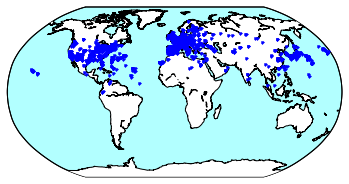

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='robin', lat_0=50, lon_0=0,
              resolution='l', area_thresh=10000.0)
m.drawcoastlines()
water_color = '#B2FFFF'
m.drawmapboundary(fill_color=water_color)
m.fillcontinents(color='white',lake_color=water_color)
x, y = m(longitude, latitude)
m.plot(x, y, 'b.')
plt.show()

### North American Observatories

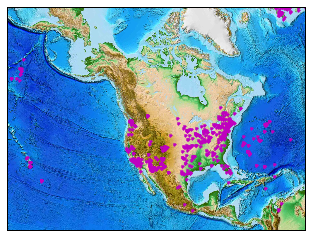

In [4]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=50,lat_0=50,lon_0=-109.)
m.etopo()
x, y = m(longitude, latitude)
m.plot(x, y, 'm.')
plt.show()

### Mauna Kea

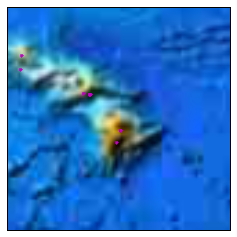

In [5]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(projection='robin', lat_0=50, lon_0=0,
              resolution='l', area_thresh=10000.0)
m.etopo()
x, y = m(longitude, latitude)
m.plot(x, y, 'm.')
plt.show()

### Note: some space telescopes are in list

In [55]:
[(i, obs) for i, obs in zip(longitude.data.data, obs_tbl['Name']) if i == 0]

[(0.0, 'Greenwich'),
 (0.0, 'Geocentric Occultation Observation'),
 (0.0, 'Spitzer Space Telescope'),
 (0.0, 'Roving Observer'),
 (0.0, 'Hipparcos'),
 (0.0, 'SOHO'),
 (0.0, 'Hubble Space Telescope'),
 (0.0, 'Geocentric'),
 (0.0, 'STEREO-A'),
 (0.0, 'STEREO-B'),
 (0.0, 'WISE'),
 (0.0, 'Swift')]

In [26]:
from astropy.coordinates import SphericalRepresentation, Latitude, Longitude
sr = SphericalRepresentation(Longitude(longitude, unit=u.deg), 
                             Latitude(latitude, unit=u.deg), R)
locations = EarthLocation.from_geocentric(*sr.to_cartesian().xyz)
ind = 0
print('{}: {}'.format(obs_tbl['Name'][ind], locations[ind].to_geodetic()))

Greenwich: (<Longitude 0.0 deg>, <Latitude 51.47737617668064 deg>, <Quantity 64.79536760235824 m>)
